<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
2. Jelaskan beberapa cara imputing missing value!
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:
1. Preprocessing data / feature engineering
- label encoding (for categorical data)
- imputing missing value
- scaling / centering


2. Imputing missing value
- drop missing value, jika jumlah missing value banyak 
- filling with mean/median, untuk data bertipe numerik
- filling with modus, untuk data bertipe kategori
- filling with bfill atau ffill
- dengan KNN


3. Ketika kita menggunakan model ML yang menghitung jarak antar data dan skala distribusi data dari suatu fitur besar, sehingga mendominasi fitur lainnya (menjadi irrelevan/misleading) maka dilakukan feature centering dan scaling.


4. Data science workflow

1. Ambil data dari sumber (database, excel, dll)
2. Processing (EDA, data analysis, feature engineering)
3. Modelling
4. Deploy
5. Monitor

---

<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

In [5]:
# Code here
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Description 
- PassengerId: the ID number given for each passenger in this dataset. You can see it as the row number.
- Survived: 0 if they died, 1 if they survived.
- Pclass: whether they were in 1st, 2nd or 3rd class.
- Name: full name including title and sometimes maiden name.
- Sex: male or female
- Age: in years
- Sibsp: number of siblings and/or spouses aboard the Titanic
- Parch: number of parents and/or children aboard the Titanic
- Ticket: the ticket number
- Fare: how much they paid for their ticket
- Cabin: the cabin number
- Embarked: which port they embarked from. C = Cherbourg, Q = Queenstown, S = Southampton

## Explolatory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


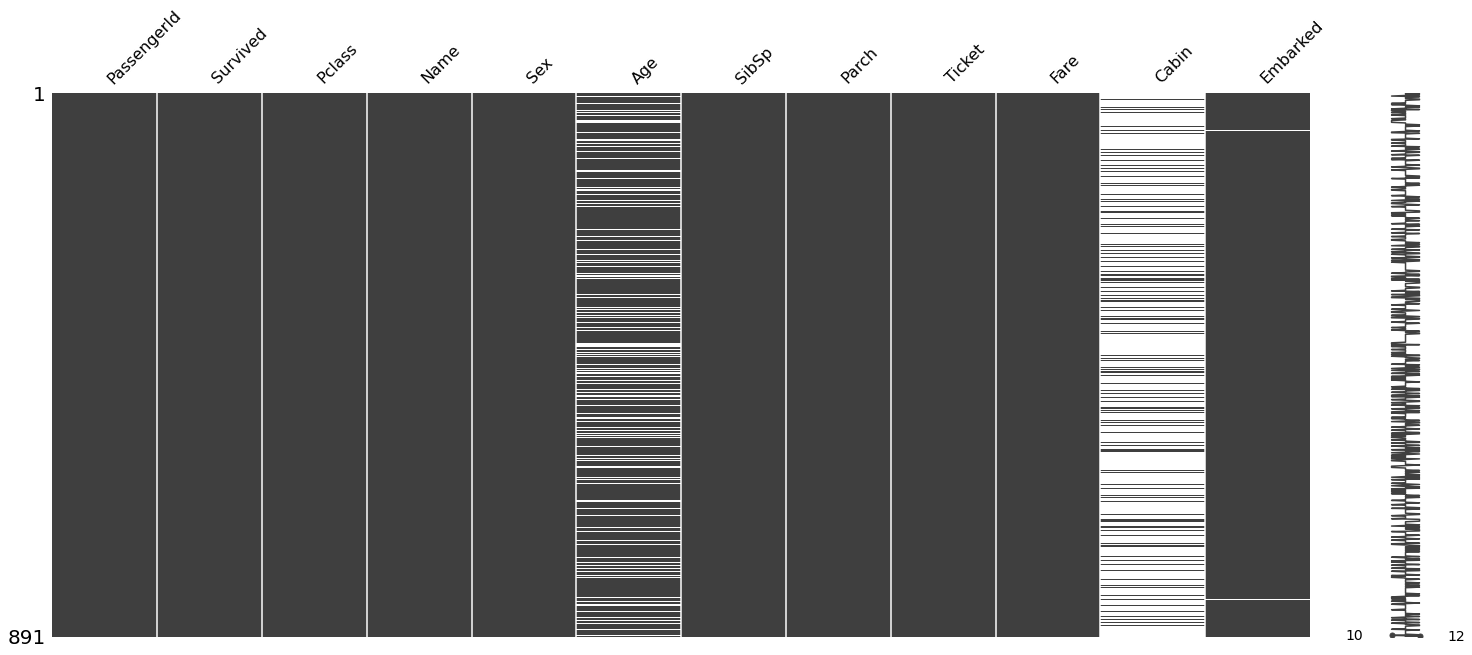

In [7]:
# check missing values
msno.matrix(df)

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# for Embarked column, there are 2 missing values, 
# I will fill it with modus data in the column
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# modus data in Embarked columns is S
df.Embarked = df.Embarked.fillna('S')

In [11]:
# for Cabin column, there are too many missing values
# so I will just drop the columns
df.drop('Cabin', axis=1, inplace=True)

In [12]:
df.Age.median()

28.0

In [13]:
# for Age column, I will fill it with median
df.Age.fillna(28, inplace=True)

In [14]:
# analysis
# features used for analysing data are Pclass, Sex, Age, and Embarked
# data target is Survived

df_ = df[['Survived','Pclass','Sex','Age','Fare','Embarked']]
df_.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208
std,0.486592,0.836071,13.019697,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


C:\Users\A45LB8.1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Distribusi penumpang berdasarkan harga tiket:
                        total_passangers  survived_passangers
Fare Quantile (Pounds)                                       
(-0.001, 7.854]                      179                   39
(7.854, 10.5]                        184                   37
(10.5, 21.679]                       172                   73
(21.679, 39.688]                     180                   80
(39.688, 512.329]                    176                  113



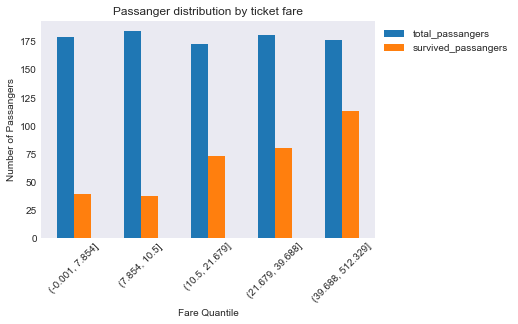

In [15]:
df_['fare_quantile'] = pd.qcut(df_['Fare'], q=5)
passanger_fare_quantile = df_['fare_quantile'].value_counts().sort_index()
passanger_fare_quantile_survived = df_.groupby('fare_quantile').sum()['Survived']
fare_plot = pd.DataFrame({'total_passangers':passanger_fare_quantile,
              'survived_passangers':passanger_fare_quantile_survived
             })
fare_plot.index.rename('Fare Quantile (Pounds)',inplace=True)
print('Distribusi penumpang berdasarkan harga tiket:\n{}\n'.format(fare_plot))
plt.style.use('seaborn-dark')
ax = fare_plot.plot(kind='bar', rot=45, title='Passanger distribution by ticket fare')
ax.set_xlabel('Fare Quantile')
ax.set_ylabel('Number of Passangers')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Dari distribusi jumlah penumpang yang selamat berdasarkan harga tiket, kemungkinan hubungan yang dapat disimpulkan adalah bahwa semakin mahal tiket, penumpang akan semakin diprioritaskan untuk diselamatkan. Kemungkinan lain adalah lokasi untuk kelas premium (harga tiket tinggi) mudah dijangkau sehingga penumpang mudah menyelamatkan diri/diselamatkan

                Age
Survived           
0         30.028233
1         28.291433


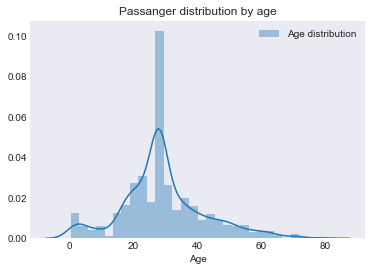

In [16]:
# Survival rate vs Age
print(df_.groupby('Survived').agg({'Age':'mean'}))
sns.distplot(df_.Age, label='Age distribution').set_title('Passanger distribution by age')
plt.legend()
plt.show()

Kebanyakan penumpang berada direntang usia 20-40 tahun. Wajar jika usia rata-rata penumpang yang survived ada diangka 28.37 yang notabene mendekati angka rataannya

terlihat puncaknya jauh lebih tinggi daripada data lain. hal ini terjadi karena kita mengisi missing values (yg cukup banyak) dengan nilai median

for more accurate analysis, its better to group the data with another feature or use binning, so we are not make a wrong assumption

C:\Users\A45LB8.1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Distribusi penumpang berdasarkan usia:
                     total_passangers  survived_passangers
Age Quantile (year)                                       
(0.419, 22.0]                     231                   98
(22.0, 28.0]                      308                  102
(28.0, 35.0]                      135                   59
(35.0, 80.0]                      217                   83



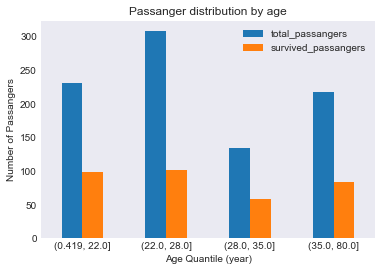

In [17]:
# distribusi usia
df_['age_quantile'] = pd.qcut(df_['Age'], q=4)
age_quantile = df_['age_quantile'].value_counts().sort_index()
age_quantile_survived = df_.groupby('age_quantile').sum()['Survived']

age_plot = pd.DataFrame({'total_passangers':age_quantile,
              'survived_passangers':age_quantile_survived
             })
age_plot.index.rename('Age Quantile (year)',inplace=True)
print('Distribusi penumpang berdasarkan usia:\n{}\n'.format(age_plot))

ax = age_plot.plot(kind='bar', rot=0, title='Passanger distribution by age')
ax.set_xlabel('Age Quantile (year)')
ax.set_ylabel('Number of Passangers')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Dari data diatas, terlihat bahwa penumpang dengan rentang usia 41-80 tahun (usia lanjut) sangat sedikit yang selamat, jika dibandingkan dengan penumpang pada rentang usia yang lain. Hal ini dapat terjadi kemungkinan karena fisik penumpang usia lanjut tidak cukup kuat untuk bertahan, meskipun penumpang usia lanjut diprioritaskan dalam penyelamatan.

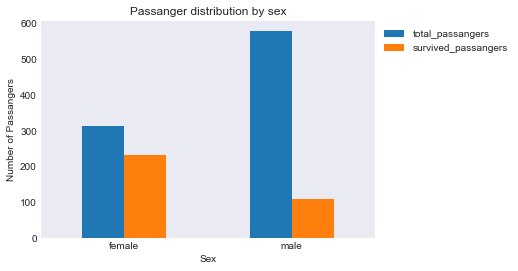

Distribusi penumpang berdasarkan jenis kelamin:
        total_passangers  survived_passangers
Sex                                          
female               314                  233
male                 577                  109



In [18]:
# Survival rate vs Sex
passanger_by_sex = df_.Sex.value_counts().sort_index()
passanger_by_sex_survived = df_.groupby('Sex').sum()['Survived']
sex_plot = pd.DataFrame({'total_passangers':passanger_by_sex,
              'survived_passangers':passanger_by_sex_survived
             })
sex_plot.index.rename('Sex',inplace=True)

# plot
ax_sex = sex_plot.plot(kind='bar', rot=0, title='Passanger distribution by sex')
ax_sex.set_xlabel('Sex')
ax_sex.set_ylabel('Number of Passangers')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

print('Distribusi penumpang berdasarkan jenis kelamin:\n{}\n'.format(sex_plot))


Dari grafik diatas, terlihat bahwa jumlah perempuan yang selamat lebih dari 2x lipat laki-laki, padahal jumlah penumpang laki-laki jauh lebih banyak dibandingkan jumlah penumpang perempuan. Hal ini mungkin terjadi sebab kecenderungan penyelamatan untuk menyelamatkan perempuan terlebih dahulu.

Distribusi penumpang berdasarkan usia:
        total_passangers  survived_passangers
Pclass                                       
1                    216                  136
2                    184                   87
3                    491                  119



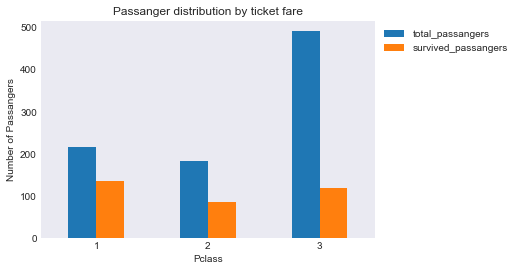

In [19]:
# Survival rate vs Pclass 
passanger_by_pclass = df_.Pclass.value_counts().sort_index()
passanger_by_pclass_survived = df_.groupby('Pclass').sum()['Survived']
pclass_plot = pd.DataFrame({'total_passangers':passanger_by_pclass,
              'survived_passangers':passanger_by_pclass_survived
             })
pclass_plot.index.rename('Pclass', inplace=True)
print('Distribusi penumpang berdasarkan usia:\n{}\n'.format(pclass_plot))

pclass_plot = pclass_plot.plot(kind='bar', rot=0, title='Passanger distribution by ticket fare')
pclass_plot.set_xlabel('Pclass')
pclass_plot.set_ylabel('Number of Passangers')
plt.legend(bbox_to_anchor=(1,1))
plt.show()



Terlihat bahwa penumpang kelas 1 lebih banyak yang selamat disusul oleh kelas 3, lalu kelas 2. Hal ini dapat terjadi karena penumpang kelas 1 lebih diutamakan dibandingkan kelas lainnya. Penumpang kelas 3 memiliki survival rate lebih tinggi dibandingkan penumpang kelas 2 karena jumlahnya jauh lebih banyak.

In [20]:
df_.groupby('Embarked').agg({'Survived':'sum'})

,Survived
Embarked,
C,93
Q,30
S,219


Penumpang dari Southampton paling banyak selamat.

### Feature engineering

Pada data titanic, saya akan menggunakan fitur Pclass, Sex, dan Age saja sebagai pertimbangan dalam menentukan target (Survived). Ketiga fitur ini yang mungkin memiliki hubungan dengan survival rate

In [21]:
df_train = df[['Survived','Pclass','Sex','Age','Fare']]
df_train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [22]:
# encode label
df_train = pd.get_dummies(df_train, columns=['Sex'])
df_train.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


In [23]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
df_train.loc[:,['Pclass','Age','Fare']] = mmscaler.fit_transform(df_train.loc[:,['Pclass','Age','Fare']])
df_train.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,0,1.0,0.271174,0.014151,0,1
1,1,0.0,0.472229,0.139136,1,0
2,1,1.0,0.321438,0.015469,1,0
3,1,0.0,0.434531,0.103644,1,0
4,0,1.0,0.434531,0.015713,0,1


### Modelling

In [24]:
# model
# split data features and target
x_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [36]:
from sklearn.base import BaseEstimator

class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

# create a pipeline - place holder estimator
pipeline = Pipeline([('clf', DummyEstimator())])

params = [{
           'clf' : [DecisionTreeClassifier()],
           'clf__criterion' : ['gini','entropy'],
           'clf__max_depth' : np.arange(1,10),
           'clf__min_samples_leaf':np.arange(2,30),
           'clf__random_state':np.arange(2,30)},
    
           {
            'clf' : [RandomForestClassifier()],
            'clf__n_estimators' : np.arange(5,10)},
           
           {
            'clf' : [KNeighborsClassifier()],
            'clf__n_neighbors': np.arange(5,20), 
            'clf__weights':['uniform', 'distance']},
           {
            'clf' : [SVC()],
            'clf__C': np.arange(0.01,100,0.01), 
            'clf__gamma':np.arange(0.001,5,0.01),
            'clf__kernel':['linear','poly','sigmoid','rbf']}
         ]
# rcv = RandomizedSearchCV(pipeline, params, scoring='roc_auc', cv=10, return_train_score=True)

In [26]:
rf = RandomForestClassifier()
param_grid = {
           'n_estimators' : np.arange(4,16,2),
           'criterion' : ['gini','entropy'],
           'max_depth' : np.arange(1,10),
           'min_samples_leaf':np.arange(1,30),
           'random_state':np.arange(2,30)
}
rcv = RandomizedSearchCV(rf, param_grid, scoring='roc_auc', cv=10, return_train_score=True)
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'n_estimators': array([ 4,  6,  8, 10, 12, 14]),
                                        'random_state': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
                   return_train_score=True, scoring='roc_auc')

In [27]:
print('Best parameters :\n{}\n'.format(rcv.best_params_))
print('Best score :\n{}\n'.format(rcv.best_score_))
print('Mean train scores :\n{}\n'.format(rcv.cv_results_['mean_train_score']))
print('Mean test scores :\n{}\n'.format(rcv.cv_results_['mean_test_score']))

Best parameters :
{'random_state': 7, 'n_estimators': 6, 'min_samples_leaf': 6, 'max_depth': 5, 'criterion': 'entropy'}

Best score :
0.8631031887502475

Mean train scores :
[0.80677598 0.86816076 0.86502369 0.92435489 0.86696145 0.87510402
 0.86688201 0.89091006 0.89730565 0.89033533]

Mean test scores :
[0.80465382 0.84678977 0.84224772 0.86197974 0.84430439 0.84897776
 0.84628727 0.85612647 0.86310319 0.84050624]



## Test the model

Sama seperti data training, fitur yang digunakan untuk menganalisis survival rate adalah Pclass, Sex, Age, dan Fare

In [28]:
df_test = pd.read_csv('titanic_test.csv')
df_test = df_test[['Pclass','Sex','Age','Fare']]
df_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   Fare    417 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [30]:
df_test.isna().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [31]:
# handle missing values
df_test.Fare = df_test.Fare.fillna(df_test.Fare.mean())
df_test.Age = df_test.Age.fillna(df_test.Age.median())

In [32]:
# encoding label
df_test = pd.get_dummies(df_test, columns=['Sex'])

In [33]:
# scaling
df_test.loc[:,['Pclass','Age','Fare']] = mmscaler.fit_transform(df_test.loc[:,['Pclass','Age','Fare']])
df_test.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,1.0,0.452723,0.015282,0,1
1,1.0,0.617566,0.013663,1,0
2,0.5,0.815377,0.018909,0,1
3,1.0,0.353818,0.016908,0,1
4,1.0,0.287881,0.023984,1,0


In [34]:
# test model
result = rcv.predict(df_test)

In [35]:
pass_id = pd.read_csv('titanic_test.csv')['PassengerId']
result_csv = pd.DataFrame({'PassengerId':pass_id,
                           'Survived':result
                          })
# save
result_csv.to_csv('titanic_prediction_fin.csv', index = False)